# Flashpoint Analytics

[Flashpoint](https://bluemaxima.org/flashpoint/) is a web-game preservation project, made in 2018 in an effort to save as many games as possible from the then upcoming Flash End-Of-Life, while also making them playable for everyone. Today, it hosts more than 170 000 games and thousands of active users all around the world.

This notebook contains a descriptive statistical analysis about the games available in Flashpoint, with an emphasis on categorical data, such as the technology that was used to make them or the publisher who used to host them in the past.

The Flashpoint database, which keeps all the data that will be used in the analysis, can be found [here](http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite).

## Import modules

In [2]:
import os
import urllib.request
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

These are the modules that we are going to use for our analysis. Notably:
* *sqlite3* allows us to communicate with a SQLite database;
* *pandas* offers very useful tools for working with data;
* *seaborn* and *matplotlib* come with some handful functions to display and visualize data.

## Retrieve data

In [3]:
#os.mkdir("data")

# download data from the source

url = "http://infinity.unstable.life/Flashpoint/Data/flashpoint.sqlite"
filename = "data/flashpoint.sqlite"
#urllib.request.urlretrieve(url, filename)

# connect to the database and store the "game" table in a dataframe

con = sqlite3.connect("data/flashpoint.sqlite")
df = pd.read_sql_query("SELECT * FROM game", con)
con.close()

## Explore data 

Let's have a first look at our data.

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177469 entries, 0 to 177468
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   177469 non-null  object 
 1   parentGameId         57600 non-null   object 
 2   title                177469 non-null  object 
 3   alternateTitles      177469 non-null  object 
 4   series               177469 non-null  object 
 5   developer            177469 non-null  object 
 6   publisher            177469 non-null  object 
 7   dateAdded            177469 non-null  object 
 8   dateModified         177469 non-null  object 
 9   platform             177469 non-null  object 
 10  broken               177469 non-null  int64  
 11  extreme              177469 non-null  int64  
 12  playMode             177469 non-null  object 
 13  status               177469 non-null  object 
 14  notes                177469 non-null  object 
 15  source           

There is a total of 27 variables and almost all of them belong to the *object* data type. We are going to need only some of them, so let's keep only the relevant ones.

In [4]:
vars_to_keep = ["id", "title", "developer", "publisher", "platform", "releaseDate", "language", "library", "tagsStr"]
df = df[vars_to_keep]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177469 entries, 0 to 177468
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           177469 non-null  object
 1   title        177469 non-null  object
 2   developer    177469 non-null  object
 3   publisher    177469 non-null  object
 4   platform     177469 non-null  object
 5   releaseDate  177469 non-null  object
 6   language     177469 non-null  object
 7   library      177469 non-null  object
 8   tagsStr      177469 non-null  object
dtypes: object(9)
memory usage: 12.2+ MB


Among the remaining variables there are no missing values.

To complete our preliminary analysis, let's print the first rows of our dataframe.

In [157]:
df.head()

,id,title,developer,publisher,platform,releaseDate,language,library,tagsStr
0,6db72888-6aa5-34c9-0ff3-ffe4cfe0fc61,All Grown Up: Krazy Karts,Ezone,Nickelodeon,3D Groove GX,,,arcade,Racing
1,3bba3af6-8e76-b2c8-b423-2d2d8bdfdd50,Showdown: The Gunfighting Game,3D Groove,3D Groove,3D Groove GX,,,arcade,Shooter
2,fb479276-2325-4dbb-bafd-64fcc8aeb684,Hamsterball Bowling,Ezone,atv.Disney.go.com,3D Groove GX,,,arcade,Arcade
3,7cdff5f4-11cb-b1de-51bc-bca13ef78adb,Dunk Tank,Ezone,atv.Disney.go.com,3D Groove GX,,,arcade,Arcade
4,1d9ff021-2404-9785-bb7d-0fceda67a55d,Baby Knight,Pepworks,Pepworks,3D Groove GX,,,arcade,Platformer


## Analyze data 

It would be interesting to know which are the most prolific developers and publishers. Let's find out by creating a frequency table for each variable and looking at the first ten entries.

In [49]:
top_developers = df["developer"].value_counts()[:10]
top_developers

                   46151
123Bee              2730
Games2Rule          2441
Games2Jolly.com     1915
Selfdefiant         1603
WowEscape.com       1436
Top10NewGames       1144
PalmarianFire       1059
Ena Game Studio     1031
Neopets              957
Name: developer, dtype: int64

The first row is blank because some games (actually, most of them) do not have a developer value associated in the database. Let's filter out those entries.

In [50]:
top_developers = df.loc[df.developer != '', "developer"].value_counts()[:10]
top_developers

123Bee             2730
Games2Rule         2441
Games2Jolly.com    1915
Selfdefiant        1603
WowEscape.com      1436
Top10NewGames      1144
PalmarianFire      1059
Ena Game Studio    1031
Neopets             957
Mirchi Games        812
Name: developer, dtype: int64

These are the most represented developers in the database. It is impressive to notice that almost all of them are known to be specialised in escape games, which we can suppose to be a very popular genre; we will dig into this later. Lastly, a special mention for Neopets, which managed to build a passionate community still active after over 20 years.

In [52]:
top_publishers = df.loc[df.publisher != '', "publisher"].value_counts()[:10]
top_publishers

DeviantArt         7655
Newgrounds         6550
Disney             2428
Nickelodeon        1659
Armor Games        1437
GameMonetize       1374
Eka's Portal       1261
Cartoon Network    1243
Kongregate         1219
Melting-Mindz      1214
Name: publisher, dtype: int64

Among the publishers, we can see some very renowned names, at least in the gaming community, like *Newgrounds*, *Armor Games* and *Kongregate*. There is also a considerable amount of games published by TV broadcasters, such as *Disney*, *Nickelodeon* and *Cartoon Network*, supposedly to promote their shows.

Now let's look at a visualization of the same data, by making use of bar plots and pie charts.

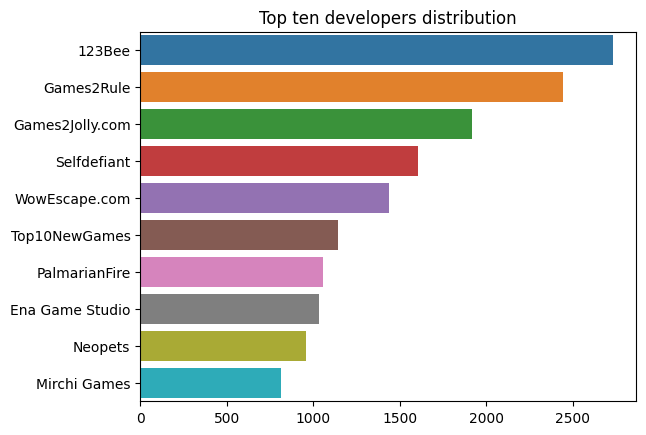

In [53]:
sns.barplot(x = top_developers.values, y = top_developers.index, orient = "h").set(title = "Top ten developers distribution");

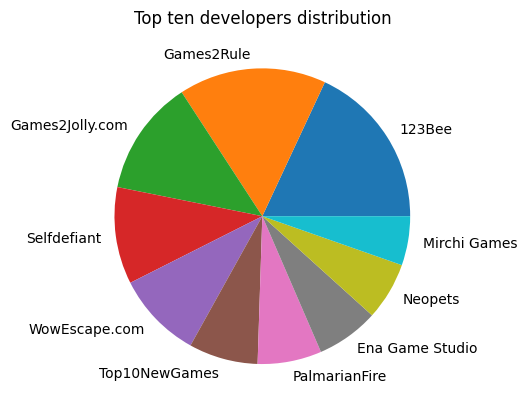

In [54]:
labels = top_developers.index
sizes = top_developers.values / top_developers.values.sum() * 100
plt.pie(sizes, labels = labels)
plt.title("Top ten developers distribution")
plt.show()

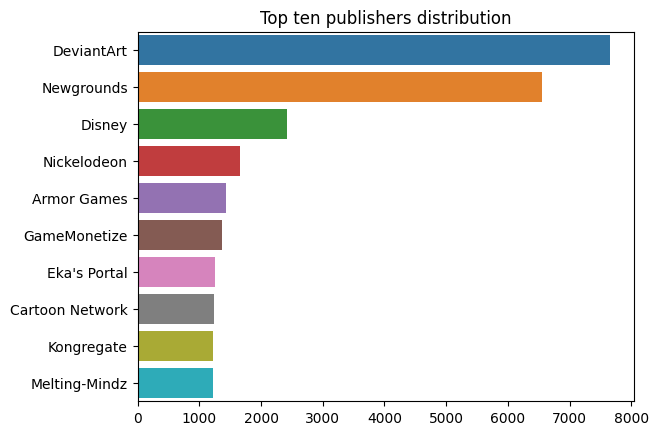

In [55]:
sns.barplot(x = top_publishers.values, y = top_publishers.index, orient = "h").set(title = "Top ten publishers distribution");

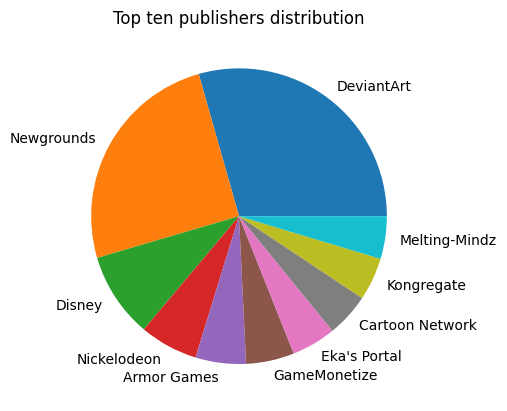

In [56]:
labels = top_publishers.index
sizes = top_publishers.values / top_publishers.values.sum() * 100
plt.pie(sizes, labels = labels)
plt.title("Top ten publishers distribution")
plt.show()

Flash games started to appear towards the end of the twentieth century and became popular in the next decade. Let's observe the release dates we have got here, being aware that they are not specified for all games.

In [5]:
df_dates = df.loc[(df.releaseDate != ""), ["title", "releaseDate", "platform", "library"]].sort_values(by=["releaseDate"])
df_dates

,title,releaseDate,platform,library
26897,TankTrouble,16-12-2007,Flash,arcade
47769,Blastar,1984,HTML5,arcade
141921,Idle Johnny,1993,Shockwave,theatre
155542,ZZZ...I want to sleep,1994,Shockwave,theatre
155541,The Health Checkup,1994,Shockwave,theatre
...,...,...,...,...
37388,GWL Hayley Footjob (Commission),2080-10-05,Flash,arcade
50821,Havok Xtra Marble Demo,21/08/2001,Shockwave,arcade
50893,Ray Cast Car,27/06/2001,Shockwave,arcade
105547,(Gift) Luna's Christmas gift,2917-12-26,Flash,theatre


There seems to be a problem with the data. Entries should follow the "YY-MM-DD" date format as per Flashpoint guidelines, but some games come in a different one. In addition, if the exact day or month of release is unknown, it is allowed to specify the year only. Let's clean up our data for consistency.

In [24]:
warnings.filterwarnings("ignore", category = UserWarning)
df_dates["releaseDate"] = pd.to_datetime(df_dates["releaseDate"], errors = "coerce")
df_dates = df_dates.dropna().sort_values("releaseDate")
df_dates

,title,releaseDate,platform,library
141921,Idle Johnny,1993-01-01,Shockwave,theatre
155542,ZZZ...I want to sleep,1994-01-01,Shockwave,theatre
155541,The Health Checkup,1994-01-01,Shockwave,theatre
141942,QP-Shot 1000,1994-01-01,Shockwave,arcade
155545,Dangerous Two,1994-01-01,Shockwave,theatre
...,...,...,...,...
176747,Defender of Ukraine,2022-12-20,HTML5,arcade
175933,Christmas in Vienna,2022-12-23,HTML5,arcade
175934,Chrysler Building,2022-12-23,HTML5,arcade
175851,Awesome Game,2022-12-23,HTML5,arcade


*Pandas* automatically assigned January 1 as month and day for those games whose only date information was the year.
There is still one odd observation, the last one, which is most likely a typo.

In [7]:
df_dates = df_dates[:-1]
df_dates[:20]

,title,releaseDate,platform,library
47769,Blastar,1984-01-01,HTML5,arcade
141921,Idle Johnny,1993-01-01,Shockwave,theatre
155542,ZZZ...I want to sleep,1994-01-01,Shockwave,theatre
155541,The Health Checkup,1994-01-01,Shockwave,theatre
141942,QP-Shot 1000,1994-01-01,Shockwave,arcade
155545,Dangerous Two,1994-01-01,Shockwave,theatre
73010,Virtual Banana Original,1994-02-01,VRML,arcade
134268,Virtual University of Auckland,1994-02-01,Hyper-G,arcade
102651,Clock Tower,1994-11-17,VRML,arcade
134765,The Austrian National Library,1994-11-17,VRML,arcade


Finally, we have got our correct release dates. We see that the oldest game in the list is *Blastar*, which was released in 1984. Actually, the game present in Flashpoint is a HTML5 version, which was developed and released much more recently. Moving on, starting from 1993 we recognize some old technologies, such as *Shochwave*, *VRML* and *Hyper-G*.

We can actually distinguish between proper games and animations by looking at the *library* column: the former are labeled with *arcade*, the latter with *theatre* values. Thus, the oldest animation featured is *Idle Johnny* from 1993, while the first "true" game (not counting *Blastar*) could be either *QP-Shot 1000* (which came out at some time in 1994), or *Virtual Banana Original* and *Virtual University of Auckland*, both from February 1st, 1994.

In [12]:
df_dates = df_dates[1:]
df_dates[-20:]

,title,releaseDate,platform,library
175058,Um Conto da Cloe,2022-12-08,HTML5,arcade
176260,Pad of Time,2022-12-08,HTML5,arcade
175153,/f/ 101,2022-12-09,Flash,arcade
176537,Vault of the Pineapples,2022-12-09,HTML5,arcade
172001,Snowsgiving Choose Your Own Adventure,2022-12-10,HTML5,arcade
177431,look_into_my_eyes_its_open_wide.swf,2022-12-10,Flash,theatre
176112,In the Name of Freedom: Black Apocalypse,2022-12-13,HTML5,arcade
175448,Mcdonalds Final,2022-12-13,HTML5,arcade
172414,The Smurfs Cooking,2022-12-13,HTML5,arcade
172155,Cartoon Network Winter Games,2022-12-14,HTML5,arcade


On the other side, here are the 20 most recent games. As expected, we find out that nowadays *HTML5* is the standard technology to make flash games, though some exceptions arise and there is even a *Flash* entry!

For the sake of completeness, let's restrict our search to *Flash*-only games.

In [25]:
df_dates.loc[(df_dates.platform == "Flash")][:20]

,title,releaseDate,platform,library
175939,Claus.com,1995-01-01,Flash,arcade
97943,"FutureWave Software, Inc. Website",1996-01-01,Flash,arcade
104809,HK Media Association website banner,1996-01-01,Flash,theatre
97921,CHAOS Website,1996-01-01,Flash,arcade
100122,Discrete Keyboard,1996-01-01,Flash,arcade
97904,2 Design's Navigational Demo,1996-01-01,Flash,arcade
98020,The Silicon Slip,1996-01-01,Flash,arcade
97944,Good Music Company Website,1996-01-01,Flash,arcade
99690,"Simple, Tasty Buttons",1996-01-01,Flash,arcade
98037,Zygomedia Website,1996-01-01,Flash,arcade


The first *Flash* game is *Claus.com* from 1995. We notice that most of these are actually websites built in *Flash* and not exactly games or animations.

To take an overall view, let's compare the various platforms by games count, considering the top five.

In [26]:
top_platforms = df_dates["platform"].value_counts()[:5]
top_platforms

Flash        59047
HTML5        10904
Shockwave     1999
Unity          875
Java           751
Name: platform, dtype: int64

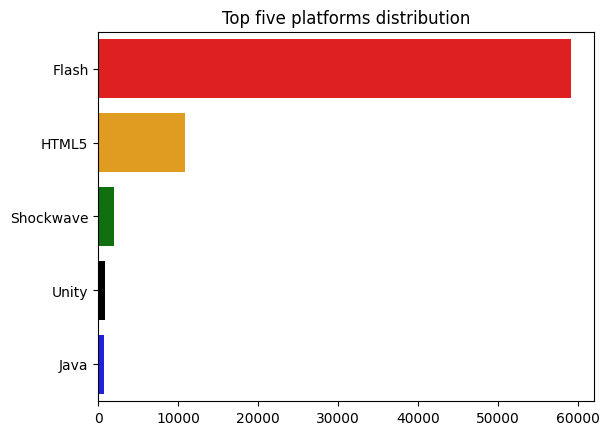

In [81]:
colors = ["red", "orange", "green", "black", "blue"]
sns.barplot(x = top_platforms.values, y = top_platforms.index, orient = "h", palette = colors).set(title = "Top five platforms distribution");

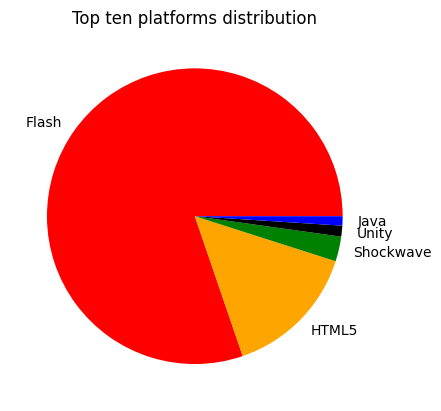

In [82]:
labels = top_platforms.index
sizes = top_platforms.values / top_platforms.values.sum() * 100
plt.pie(sizes, labels = labels, colors = colors)
plt.title("Top ten platforms distribution")
plt.show()

*Flash* is clearly the winner, followed by a rising *HTML5* and its old companion *Shockwave*, with *Unity* and *Java* as outsiders.

Web games were at their peak in the 2000s and many gamers are nostalgic about that decade, which could be considered a golden age. Thus, we expect to see that most of the games in our database have been released between 2000 and 2009. Let's check it out, while also comparing technologies against years.

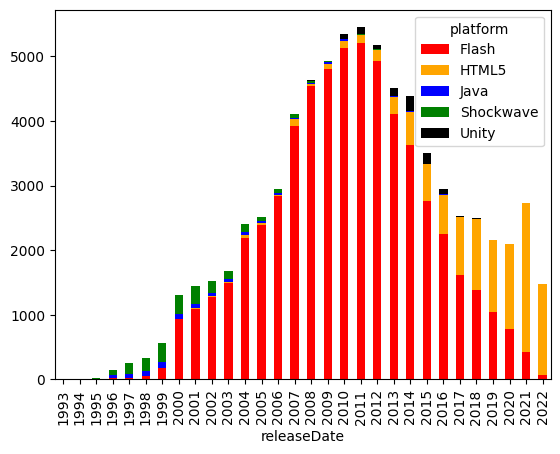

In [84]:
df_year_platform = df_dates.loc[(df_dates["platform"].isin(top_platforms.index)), :].copy()
years = df_year_platform["releaseDate"].astype(str).str[:4]
df_year_platform[df_year_platform.columns[1]] = years.values
df_year_platform.groupby(["releaseDate", "platform"]).size().unstack().plot(kind = 'bar', stacked = True, color = ["red", "orange", "blue", "green", "black"]);

Et voila! As we were expecting, web games have steadily risen in popularity in the first decade of the third millennium, reached a peak in 2011 and today their number is slowly decreasing, apart from some fluctuations. This does not mean that fewer games are being made: it could simply be that there is less incentive to curate and preserve a recent game written in a technology which will probably stay on for a long time compared to an old game with a nostalgic value that runs the risk to disappear at any time.

*Flash* dominated the scene between 2000 and 2017 (it's impressive to see that it lasted so long), while *HTML5* started to be relevant around 2013. *Shockwave* was most popular between 1996 and 2000, but continued to be used until 2007. *Unity* had six years of relative notoriety (2010-2016) and lastly, Java, despite being one of the first technologies eligible for making web games, has never known much use and moved off the radar around 2010.